La page ci-présente existe en version notebook téléchargeable grâce au bouton ![Bouton](./images/bouton_tl.png) (choisir le format `.ipynb`). On rappelle qu'l faut ensuite l'enregistrer dans un répertoire adéquat sur votre ordinateur (`tp3` par exemple dans votre répertoire personnel) puis lancer Jupyter Notebook depuis Anaconda pour accéder au notebook, le modifier et exécutez les cellules de code adéquates.

# (TP) Création du signal

Nous n'allons pas réaliser le montage complet directement mais nous allons étudié séparément chaque étage du montage au préalable. Cela permettra de mieux comprendre le fonctionnement de chaque élément et de mettre en lumière certaines pratiques en électrocinétique. C'est de plus une pratique __vivement__ conseillée quand on doit construire un système complexe de tester chaque partie avant de les assembler.

Pour le compte-rendu, vous devrez rendre compte de l'analyse de chaque étage avant de présenter l'étude complète.

Dimensionnement pour les tests :
* Fréquence du signal porteur : $f_p = 10kHz$
* Fréquence du signal modulant : $f_m = 500Hz$
* Amplitude des deux signaux : 10V initialement. On modifiera par la suite l'amplitude des signaux.

## Le multiplieur (30 minutes)
Nous allons :
* Tester son fonctionnement
* Utiliser le tracé temporel de la sortie pour retrouver les fréquences des signaux d'entrée.
* Utiliser FOXY et l'Atelier scientifique pour tracé le spectre du signal de sortie et observer la non linéarité du dispositif.

````{admonition} Manipulation
:class: tip
1. Alimenter le multiplieur et lui envoyer les deux signaux porteur et modulant. Observer avec la carte d'acquisition FOXY le signal sortant (quels réglages pour l'Atelier scientifique ?)
2. Utiliser le tracé temporel pour déterminer la fréquence des signaux porteur et modulant. Estimer l'incertitude sur les deux fréquences. Vérifier la cohérence avec les valeurs réglées sur les GBF.
3. Obtenir le tracé du spectre (Traitement des données, Transformée de Fourier) du signal et analyser les valeurs des fréquences. On vérifiera sommairement la cohérence avec les valeurs attendues sans chercher à estimer un écart normalisé.
4. Expliquer pourquoi l'analyse seule du spectre permet de savoir que le système est non linéaire.
````

## Le sommateur (2h)

On prendra $R_1 = 8k \Omega$ et $R_2 = 1k \Omega$

### Sommateur seul.
On veut vérifier :
* visuellement que le signal sortie correspond bien à la somme des signaux d'entrée.
* Estimer la valeur expérimentale de $\alpha$ grâce plusieurs mesures des tensions d'entrée et de sortie.

Pour tester le montage, on prendra comme signaux d'entrée les signaux porteur et modulant, même si ce ne sont pas les signaux qui entreront réellement dans le système complet.

````{admonition} Manipulation
:class: tip
1. Réaliser le montage pour obtenir les deux tensions d'entrée et la tension de sortie sur FOXY. Vérifier alors visuellement que le signal de sortie est bien la somme des deux signaux d'entrée.
2. Les signaux sont sinusoïdaux. Quelles grandeurs mesurer pour mesurer expérimentalement $\alpha$ à partir des signaux précédents ?
3. Réaliser des mesures de $\alpha$ pour plusieurs valeurs d'amplitude des tensions d'entrée (on fera 5 mesures). __Pensez à estimer les incertitudes pour chaque mesure__ (Vous êtes autorisésà ne conservé que la plus grande incertitude de mesure pour chaque mesure pour simplifier l'étude).
4. Utiliser la cellule ci-dessous pour estimer l'incertitude sur $\alpha$ à partir des mesures précédentes. Les parties à modifier sont précisées.
````

D:\cedri\anaconda3\envs\prepa\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\cedri\anaconda3\envs\prepa\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\cedri\anaconda3\envs\prepa\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\cedri\anaconda3\envs\prepa\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
D:\cedri\anaconda3\envs\prepa\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\cedri\anaconda3\envs\prepa\lib\site-packages\matplotlib\axes\_axes.py:1174: RuntimeWarning: All-N

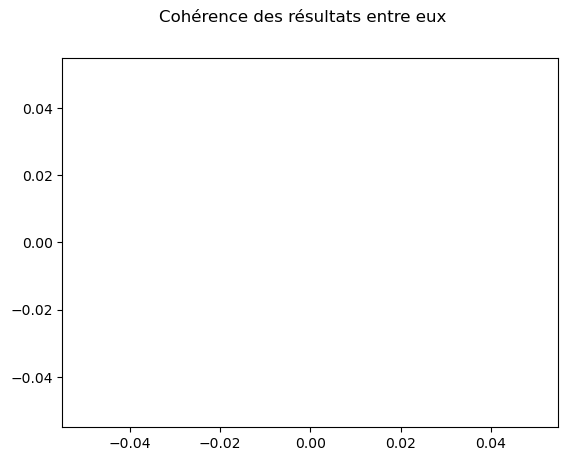

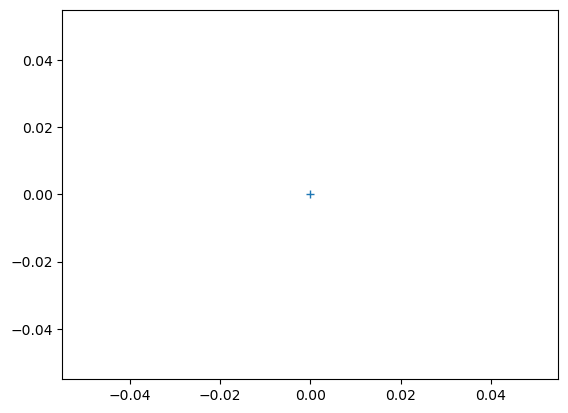

La valeur attendue est alpha_th = 0.10000073730769982 +/- 0.0006537240077021402
La valeur experimentale alpha_exp = nan +/- nan
Ecart normalisé : 0


In [1]:
"""Importation les bibliothèques scientifiques nécessaires :  numpy, matplotlib.pyplot, numpy.random"""
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd


""" ------------ PARTIE A MODIFIER
Simulation des valeurs. On a 5 jeux de mesures, on va donc utiliser un tableau numpy. Vous devez :
- Créer trois vecteurs numpy contenant les 5 résultats de mesurage des tensions d'entrée et de sortie
- Créer trois vecteurs numpy contenant les 5 incertitudes associées aux tensions d'entrée et de sortie (vous pouvez vous limiter pour simplifier à l'incertitude la plus importante pour chaque mesure).
"""
v1_m = np.array([0])
v2_m = np.array([0])
vs_m = np.array([0])
v1_u = np.array([0])
v2_u = np.array([0])
vs_u = np.array([0])


""" ---------------- PARTIE DEJA ECRITE
Ici on va:
- Utiliser les vecteurs précédents pour créer 3 tableaux contenant N échantillons des tensions d'entrée et
de sortie associées aux distributionx choisies pour décrire la dispersion des résultats de mesurage.
Rappel de syntaxe : rd.normal(x_mes, ux_mes, (N, k)) ou rd.uniform(x_mes, ux_mes, (N, k))
où x_mes et ux_mes sont les vecteurs associées aux résultats de mesurage et incertitudes
et k la taille des deux vecteurs.
"""
k = len(v1_m)
N = 1000000 # Nombre de simulations

v1_sim = v1_m + rd.uniform(-v1_u, v1_u, (N, k))  # Il faudra peut-être plusieurs tableaux si vous avez plusieurs sources d'incertitude
v2_sim = v2_m + rd.uniform(-v2_u, v2_u, (N, k))  # Il faudra peut-être plusieurs tableaux si vous avez plusieurs sources d'incertitude
vs_sim = vs_m + rd.uniform(-vs_u, vs_u, (N, k))  # Il faudra peut-être plusieurs tableaux si vous avez plusieurs sources d'incertitude


""" ------------ PARTIE A MODIFIER
Obtenir le tableau des valeurs simulées  de alpha. On rappelle que
les tableaux numpy permettent la vectorialisation (application
  des opérations termes à termes entre deux tableaux
  de même taille).
"""
alpha_sim = np.array([])  # LIGNE A MODIFIER


""" ---------------- PARTIE DEJA ECRITE
On va :
- Déterminer la moyenne et l'écart-type pour chaque jeux de mesure sur les N échantillons.
Rappel :
mean(tableau, axis = 0) pour moyenner par colonne
std(tableau, ddof=1,  axis = 0) pour calculer l'écart-type par colonne

Puis:
- Calculer la moyenne des valeurs de alpha et son incertitude.
On rappelle que l'incertitude sur la moyenne s'écrit : Ecartype des 5 valeurs / sqrt(5) (ici k = 5)
"""

alpha_sim_m = np.mean(alpha_sim, axis=0)  # Moyenne des N simulations pour chaque mesure
alpha_sim_u = np.std(alpha_sim, ddof=1,  axis = 0)  # Ecart-type des N simulations pour chaque mesure

alpha_m = np.mean(alpha_sim_m)
alpha_u = np.std(alpha_sim_m) / np.sqrt(k)


""" VERIFICATION DE LA COHERENCE DES MESURES
On va vérifier:
- la cohérence des mesures avec la moyenne en calculant les écarts normalisés entre chaque valeur de alpha et la valeur moyenne
- la cohérence entre la valeur moyenne et la valeur théorique
"""

""" COHERENCE AVEC LA VALEUR MOYENNE """
""" ------------ PARTIE A MODIFIER
Ecarts normalisés entre cahque valeur et la moyenne
"""
alpha_en = 0  # LIGNE A MODIFIER (penser à la vectorialisation)

""" ---------------- PARTIE DEJA ECRITE
Analyse des différents résultats. On donne ici le tracé à analyser.
"""
f, ax = plt.subplots()  # On va tracer les barres d'incertitude et la comparer la valeur moyenne.
f.suptitle("Cohérence des résultats entre eux")  # Titrer le graphique
ax.set_ylabel("")  # Titrer les ordonnées

ax.errorbar(np.arange(k), alpha_sim_m, yerr=alpha_sim_u, capsize=2)  # Représentation des valeurs
ax.plot([-1, k], [alpha_m, alpha_m], color='b')  # Valeur mesurée de alpha

f1, ax1 = plt.subplots()  # On va tracer les écarts normalisés
f1.suptitle("")  # Titrer le graphique

ax1.plot(np.arange(k), alpha_en, marker='+')  # Ecarts normalisés

plt.show() 

""" COHERENCE AVEC LA VALEUR ATTENDUE """
""" ---------------- PARTIE DEJA ECRITE
On doit calculer l'incertitude sur alpha_attendu par simulation de Monte-Carlo"""
R1 = 8
R2 = 1
uR1 = 0.01 * R1  # Incertitude obtenue grâce au code couleur
uR2 = 0.01 * R2  # Incertitude obtenue grâce au code couleur

N = 1000000
R1_sim = rd.uniform(R1-uR1, R1+uR1, N)
R2_sim = rd.uniform(R2-uR2, R2+uR2, N)
alpha_th_sim = R2_sim / (2 * R2_sim + R1_sim)  # Valeurs simulées de alpha

alpha_th_m = np.mean(alpha_th_sim)
alpha_th_u = np.std(alpha_th_sim, ddof=1)

# Les chiffres significatifs ne sont pas corrects:
print("La valeur attendue est alpha_th = {} +/- {}".format(alpha_th_m, alpha_th_u))
print("La valeur experimentale alpha_exp = {} +/- {}".format(alpha_m, alpha_u))


""" ------------ PARTIE A MODIFIER
Ecarts normalisés entre la moyenne et la valeur attendue
"""
alpha_m_en = 0  # A MODIFIER

print("Ecart normalisé : {}".format(alpha_m_en))

````{admonition} Exploitation
:class: tip
Utiliser les résulats précédents pour comparer la valeur mesurée de $\alpha$ avec sa valeur théorique.
````

### Ajout du montage avec ALI

#### Etude préliminéaire sur l'ALI
Avant d'utilise le montage choisi, nous allons observer quelques caractéristiques du montage __amplificateur non inverseur__. On choisira les résistances du montage pour avoir un gain de 10. (__Prendre une résistance variable pour la résistance réalisant la rétroaction__).

````{admonition} Manipulation
:class: tip
1. Vérifier __sommairement__ que le montage réalise bien un amplificateur non inverseur dont le gain est proche de celui attendu.
2. Que se passe-t-il lorsqu'on augmente trop la tension d'entrée (en valeur positive ou négative) ? On parle de __saturation en tension__. Si l'on observe par la suite une saturation en tension, quelle méthode pour la faire disparaître ?
3. Réaliser le même montage mais en inversant les bornes `+` et `-` de l'ALI. Qu'observe-t-on ? Conclure quant à la nécessite d'une boucle de rétroaction __négative__ pour observer un fonctionnement linéaire.
````

#### Association au sommateur
````{admonition} Manipulation
:class: tip
1. Réaliser maintenant le montage avec ALI choisi dans l'étude préliminaire. Choisir des résistances (dont une variable) aux valeurs adaptées en fonction de votre étude préliminaire. L'associer au montage sommateur.
2. Ajuster la valeur de la résistance variable de manière à avoir la relation $v_s = v_1 + v_2$. On pensera à rendre compte de la réalisation de ce montage en précisant les valeurs des résistances choisies.
````

## Montage complet. (1h)
### Analyse temporelle et fréquentielle
````{admonition} Manipulation
:class: tip
1. Réaliser le montage complet pour obtenir le signal modulé en amplitude complet. L'observer avec la carte d'acquisition FOXY.
2. Mesurer expérimentalement le taux de modulation $m$ et le comparer à sa valeur attendue.
3. Tracer le spectre signal. Vérifier la présence des fréquences attendues (on ne demande pas de calcul d'écart normalisé mais on se demandera quelle est l'incertitude de mesure sur les fréquences du signal).
4. Modifier la durée d'acquistion et observer son effet sur l'incertitude de mesure des fréquences.
5. Rendre compte de la réalisation du montage complet et de l'analyse du signal modulé.
````
### Utilisation de l'oscilloscope
Vous allez vous entrainer à utiliser l'oscilloscope pour observer un signal plus complexe.

````{admonition} Manipulation
:class: tip
1. Vérifier qu'il n'y a pas de problème de Terre pour pouvoir observer le signal de sortie à l'oscilloscope.
2. Méthode 1 - Observation du signal seul : Réfléchir aux réglages de base de temps et de synchronisation le plus adapté pour observer le signal de manière à peu près stable.
3. Méthode 2 - Synchronisation sur un signal annexe : Sur quel autre signal peut-on synchroniser pour observer l'enveloppe du signal modulé de manière stable. Réaliser la manipulation. Mesurer à nouveau le taux de modulation (sans calcul d'incertitude cette fois).
````

````{admonition} Compte-rendu
:class: tip
Rendre-compte :
1. Du montage complet choisi pour la création du signal modulé
2. De l'étude du multiplieur
3. De l'étude du sommateur puis de son association avec l'ALI
4. Des observations réalisées sur le montage complet
````

## Signal modulé au GBF (30 minutes)
On peut utiliser les fonctions des GBF (certains) pour réaliser directement un signal modulé en amplitude. Vous allez apprendre à utiliser ce système pour ne pas avoir à refaire le montage précédent pour étudier la démodulation.

__La présentation des réglages est propre aux GBF utilisés dans cette salle (SDGXXXXX). Elled evra être adaptée à l'utilisation d'un autre GBF.__


````{admonition} Manipulation
:class: tip
1. Réaliser le signal porteur à l'aide des réglages classiques sur la sortie voulue (1 ou  2) (forme, fréquence, amplitude, offset).
2. Activer la modulation d'amplitude avec le bouton `Mod` (_il doit s'éclairer - un deuxième appui permet de désactiver la modulation_).
3. Les boutons sous l'écran permettent de régler le signal modulant:
    * 'Type' : 'AM'
    * 'Source' : 'Internal'
    * 'Shape' : Forme du signal modulant
    * 'AM Freq' permet de régler la fréquence du signal modulant (_pavé numérique + unité sous l'écran ou molette_).
    * 'AM Depth' permet de régler _directement_ le taux de modulation: on règle $m$ en pourcentage ($m=1$ correspond à 100%, vous pouvez monter au dessus de 100% pour observer une surmodulation).
    * une forme du signal s'affiche à l'écran, mais __vérifier toujours les caractéristiques du signal par acquisition sur l'oscilloscope ou FOXY__. Pour ce TP, on privilégiera l'oscilloscope pour s'entraîner à son utilisation.
5. Observer le signal modulé en amplitude à l'oscilloscope.
6. Note : Pour mieux synchroniser, vous pouvez observer un signal de même fréquence que le signal modulant composé de "Pulse" avec la sortie `Aux In/Out` situé __à l'arrière du GBF__. Il faut l'activer dans le menu 'Utility > Sync > State : On' + 'Channel : CH1-MOD'.
````